In [91]:
import pandas as pd 
import plotly.express as px
df = pd.read_csv('./spotify-2023.csv', encoding='latin1')
df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [92]:
df.shape

(953, 24)

In [93]:
df.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_

In [94]:
df = df.dropna(subset=['key'])
df.head

<bound method NDFrame.head of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mont

rename_artists = {'artist(s)_name': 'artist'}
df.rename(columns=rename_artists, inplace=True)
df.head()

In [90]:
nan_values = df.isna()
print(nan_values)

     track_name  artist  artist_count  released_year  released_month  \
0         False   False         False          False           False   
1         False   False         False          False           False   
2         False   False         False          False           False   
3         False   False         False          False           False   
4         False   False         False          False           False   
..          ...     ...           ...            ...             ...   
948       False   False         False          False           False   
949       False   False         False          False           False   
950       False   False         False          False           False   
951       False   False         False          False           False   
952       False   False         False          False           False   

     released_day  in_spotify_playlists  in_spotify_charts  streams  \
0           False                 False              False    Fa

top_stats = ['track_name', 'streams', 'bpm','key','mode','danceability_%','valence_%','energy_%','acousticness_%', 'instrumentalness_%','liveness_%','speechiness_%']
df_top_stats = df[top_stats]
df_top_stats.head()

In [95]:
df = df.dropna(subset=['key'])
df.dropna(inplace=True)

In [96]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    object 
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    object 
 14  bpm                   817 non-null    int64  
 15  key                   817 no

In [98]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

View Top Columns

In [99]:
top_stats = ['track_name', 'streams', 'bpm','key','mode','danceability_%','valence_%','energy_%','acousticness_%', 'instrumentalness_%','liveness_%','speechiness_%']
df_top_stats = df[top_stats]
df_top_stats.head()

,track_name,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),141381703.0,125,B,Major,80,89,83,31,0,8,4
1,LALA,133716286.0,92,C#,Major,71,61,74,7,0,10,4
2,vampire,140003974.0,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,800840817.0,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,303236322.0,144,A,Minor,65,23,80,14,63,11,6


In [100]:
df_features = df.head()
df_features = pd.get_dummies(df_features, columns=['key','mode'],prefix = ['key','mode']) 

Show top

In [101]:
df_features.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_B,key_C#,key_F,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,31,0,8,4,False,True,False,False,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,7,0,10,4,False,False,True,False,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,17,0,31,6,False,False,False,True,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,11,0,11,15,True,False,False,False,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,14,63,11,6,True,False,False,False,False,True


Rename Columns 

In [102]:
rename_col = {'danceability_%': 'danceability',
              'valence_%': 'valence',
              'energy_%': 'energy',
              'acousticness_%': 'acousticness',
              'instrumentalness_%': 'instrumentalness',
              'liveness_%': 'liveness',
              'speechiness_%': 'speechiness',
              'track_name': 'song'
             }
df_features.rename(columns=rename_col, inplace=True)
df_features.head()


,song,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,acousticness,instrumentalness,liveness,speechiness,key_A,key_B,key_C#,key_F,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,31,0,8,4,False,True,False,False,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,7,0,10,4,False,False,True,False,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,17,0,31,6,False,False,False,True,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,11,0,11,15,True,False,False,False,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,14,63,11,6,True,False,False,False,False,True


Data Analysis !!

In [104]:
import matplotlib.pyplot as plt
artist_appearances = df['artist(s)_name'].value_counts().reset_index()
artist_appearances.columns = ['artist(s)_name', 'appearance_count']
top_20_artists = artist_appearances.head(20)
print(top_20_artists)


      artist(s)_name  appearance_count
0       Taylor Swift                29
1                SZA                17
2          Bad Bunny                16
3         The Weeknd                15
4     Kendrick Lamar                12
5       Harry Styles                12
6      Morgan Wallen                 9
7               Feid                 8
8   Drake, 21 Savage                 7
9                BTS                 7
10        Ed Sheeran                 7
11          NewJeans                 6
12    Olivia Rodrigo                 5
13          Labrinth                 5
14            Eminem                 4
15         Mï¿½ï¿½ne                 4
16             Drake                 4
17          Doja Cat                 4
18             Adele                 4
19      Shawn Mendes                 3


Top 15 Artists 

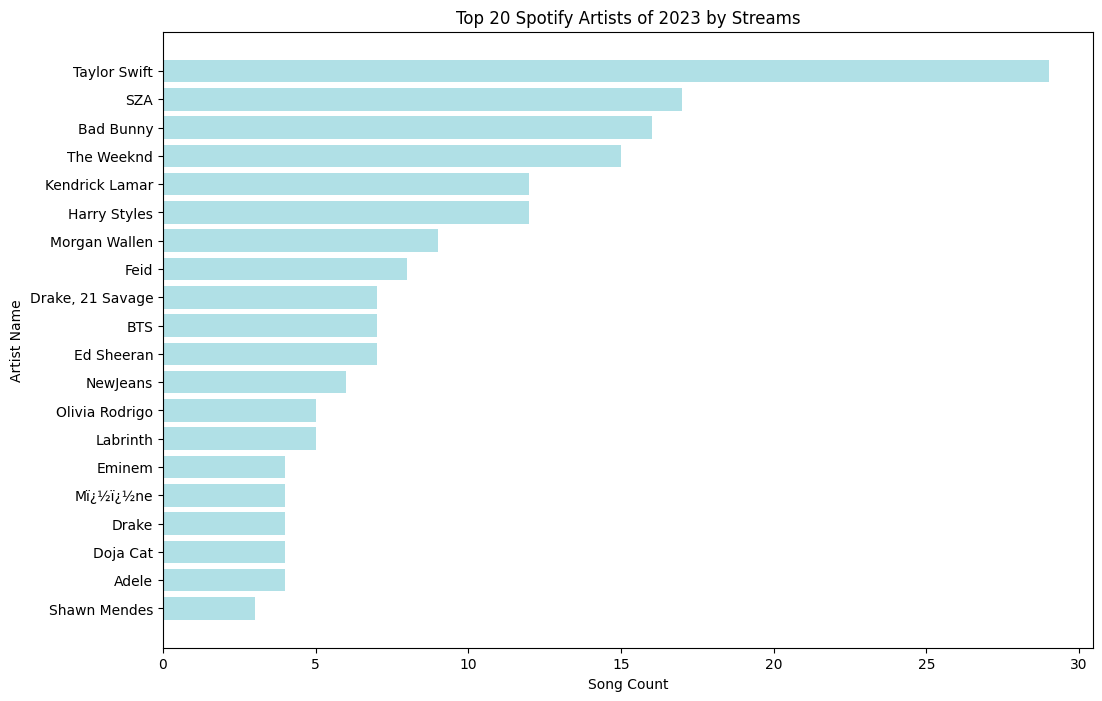

In [105]:
plt.figure(figsize = (12,8))
plt.barh(top_20_artists['artist(s)_name'],top_20_artists['appearance_count'],color='powderblue')
plt.xlabel('Song Count')
plt.ylabel('Artist Name')
plt.title('Top 20 Spotify Artists of 2023 by Streams')
plt.gca().invert_yaxis()
plt.tight_layout
plt.show()

In [106]:
df_analysis = df_features.drop(columns=['song'])
df_analysis.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,acousticness,instrumentalness,liveness,speechiness,key_A,key_B,key_C#,key_F,mode_Major,mode_Minor
0,"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,...,31,0,8,4,False,True,False,False,True,False
1,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,...,7,0,10,4,False,False,True,False,True,False
2,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,...,17,0,31,6,False,False,False,True,True,False
3,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,...,11,0,11,15,True,False,False,False,True,False
4,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,...,14,63,11,6,True,False,False,False,False,True


In [117]:
def get_discography(artist):
    discography = df.loc[df["artist(s)_name"]== artist]
    return discography

search = get_discography('Frank Ocean')
search

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
186,Pink + White,Frank Ocean,1,2016,8,20,21574,30,806397070.0,112,...,160,A,Major,54,54,55,67,0,42,11
657,Lost,Frank Ocean,1,2012,1,1,29499,11,822239726.0,124,...,123,A#,Minor,91,49,61,3,0,17,22


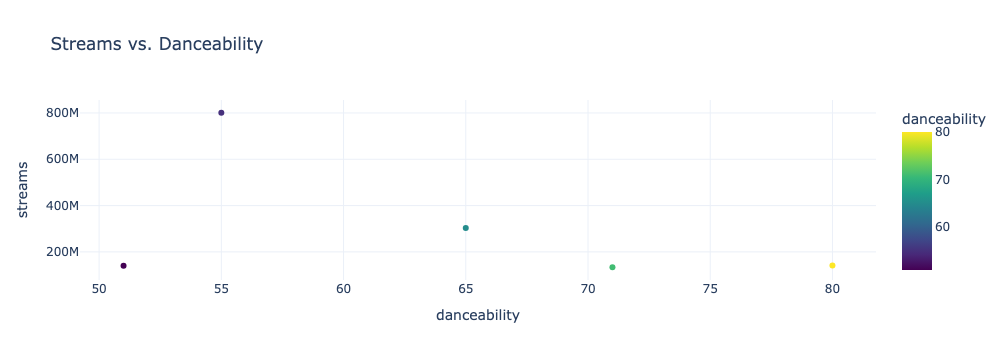

In [109]:
px.scatter(df_features, x='danceability', y='streams',color = 'danceability', 
           color_continuous_scale=px.colors.sequential.Viridis,template='plotly_white',
           title = "Streams vs. Danceability")

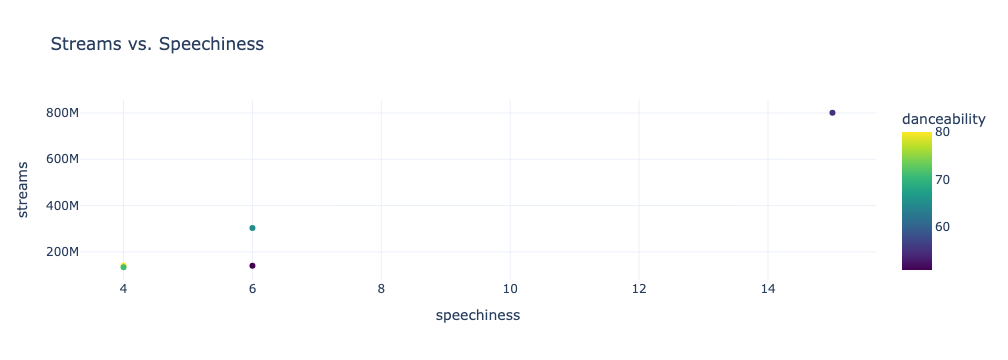

In [110]:
px.scatter(df_features, x='speechiness', y='streams',color = 'danceability', 
           color_continuous_scale=px.colors.sequential.Viridis,template='plotly_white',
           title = "Streams vs. Speechiness")

-->  Values between 0.33 and 0.66 indicate that the track may contain both music and speech, including rap music

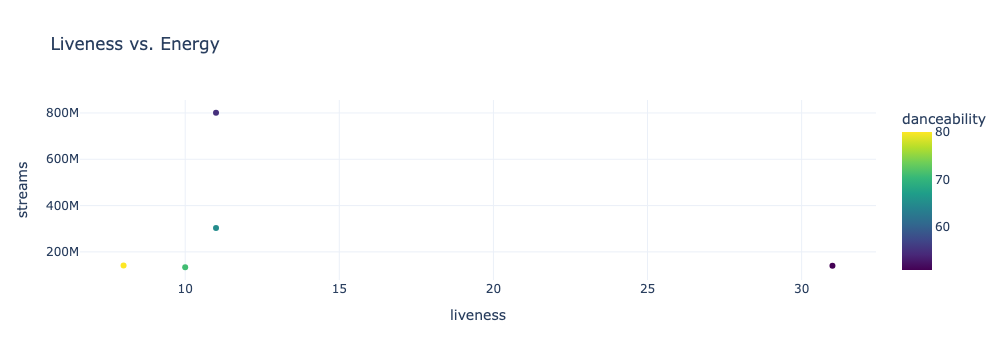

In [111]:
px.scatter(df_features, x='liveness', y='streams',color = 'danceability', 
           color_continuous_scale=px.colors.sequential.Viridis,template='plotly_white',
           title = "Liveness vs. Energy")

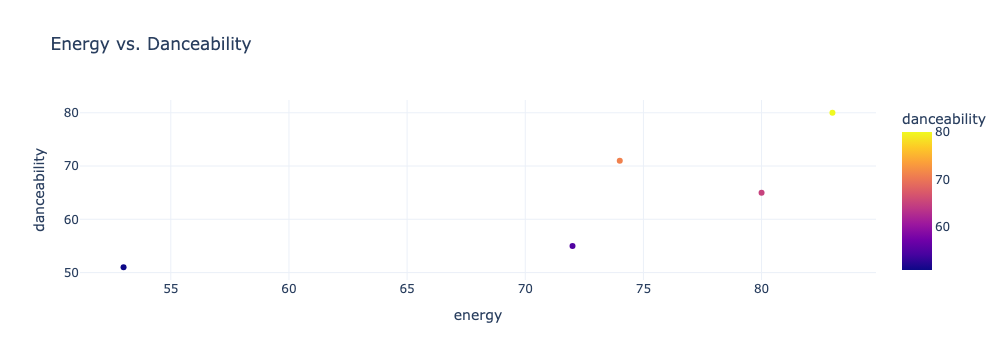

In [112]:
px.scatter(df_analysis, x='energy', y='danceability',color = 'danceability', 
           color_continuous_scale=px.colors.sequential.Plasma,template='plotly_white',
           title = "Energy vs. Danceability")

In [113]:
df_songs_artists = display(df[['streams', 'track_name', 'artist(s)_name']])

,streams,track_name,artist(s)_name
0,141381703.0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook"
1,133716286.0,LALA,Myke Towers
2,140003974.0,vampire,Olivia Rodrigo
3,800840817.0,Cruel Summer,Taylor Swift
4,303236322.0,WHERE SHE GOES,Bad Bunny
...,...,...,...
948,91473363.0,My Mind & Me,Selena Gomez
949,121871870.0,Bigger Than The Whole Sky,Taylor Swift
950,73513683.0,A Veces (feat. Feid),"Feid, Paulo Londra"
951,133895612.0,En La De Ella,"Feid, Sech, Jhayco"


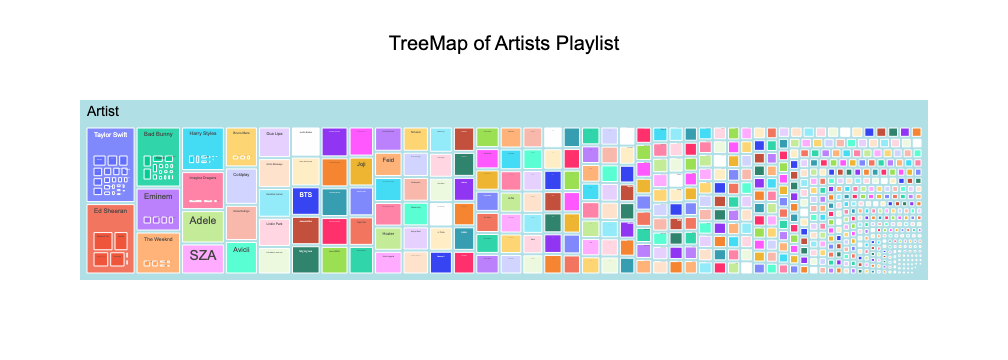

In [114]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

fig = px.treemap(df, path=[px.Constant('Artist'), 'artist(s)_name', 'track_name'],
                 values='streams', title='TreeMap of Artists Playlist',
                color_continuous_scale='blues')
fig.update_traces(root_color='powderblue')
fig.update_layout(
    title_x=0.5, 
    font=dict(
        family="Arial",  
        size=14,        
        color="black"   
    )
)

fig.show()




